# Exercise 1.1

Run complete for eta = 0.05. Final Theta: 2.9845
Run complete for eta = 0.2. Final Theta: 3.0000
Run complete for eta = 1.0. Final Theta: 0.0000


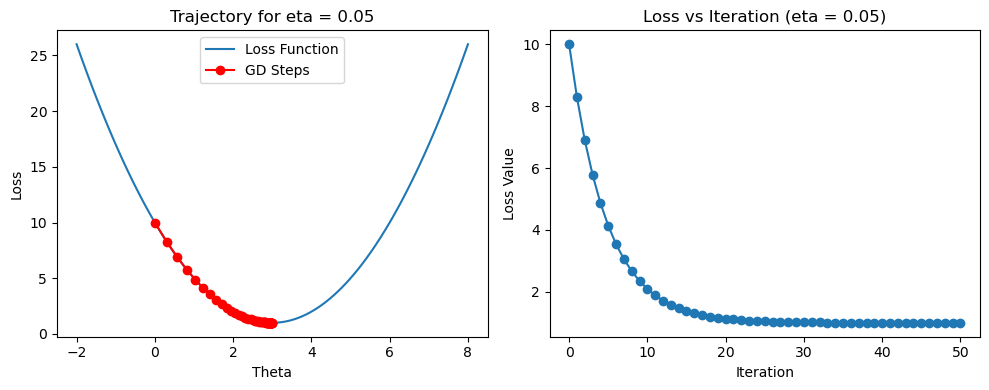

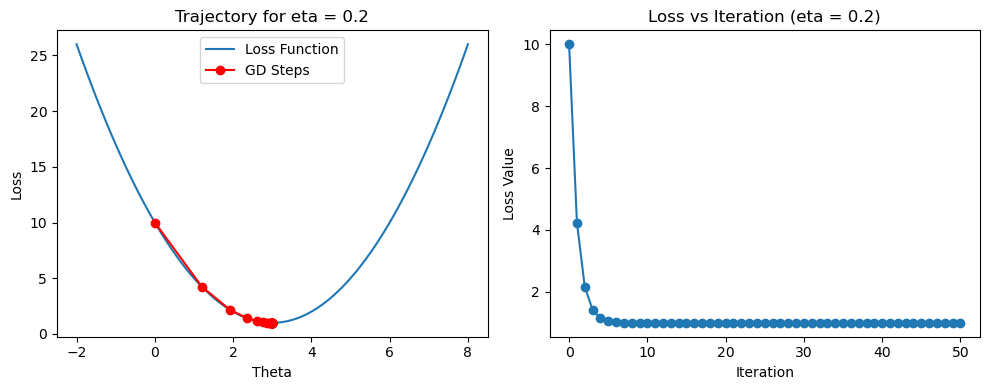

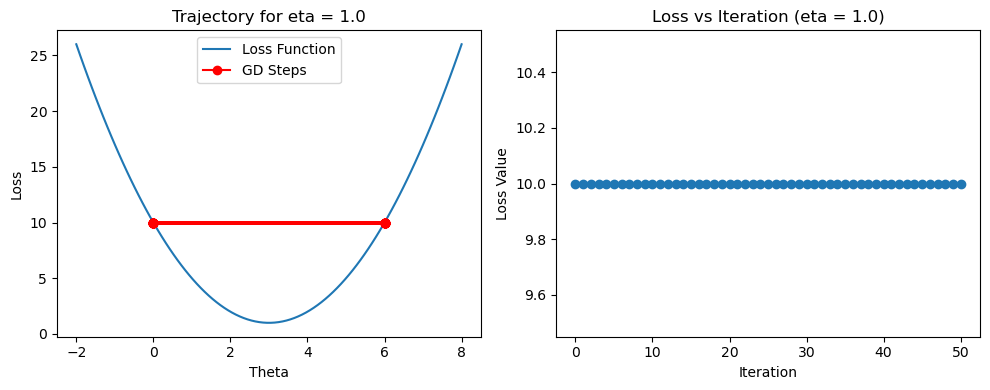

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(theta):
    return (theta - 3)**2 + 1

def gradient_fn(theta):
    return 2 * (theta - 3)

def GD(loss_function, gradient_function, start_theta, learning_rate=0.01, n_iterations=100):

    theta = start_theta
    theta_history = [theta]

    for _ in range(n_iterations):
        grad = gradient_function(theta)
        
        theta = theta - learning_rate * grad
        theta_history.append(theta)
    
    theta_history = np.array(theta_history)
    loss_history = loss_function(theta_history)   
    return theta_history, loss_history

start_theta = 0.0
n_iter = 50
etas = [0.05, 0.2, 1.0]

results = {}


for eta in etas:
    thetas, losses = GD(loss_fn, gradient_fn, start_theta, eta, n_iter)
    #Collects the data for each eta in a dictionary 
    results[eta] = { 
        'thetas': thetas,
        'losses': losses
    }

    print(f"Run complete for eta = {eta}. Final Theta: {thetas[-1]:.4f}")


theta_range = np.linspace(-2, 8, 100)
loss_range = loss_fn(theta_range)

for eta in etas:

    th_hist = results[eta]['thetas']
    loss_hist = results[eta]['losses']
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(theta_range, loss_range, label='Loss Function')
    plt.plot(th_hist, loss_hist, 'o-', color='red', label='GD Steps')
    plt.title(f"Trajectory for eta = {eta}")
    plt.xlabel("Theta")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss_hist, 'o-')
    plt.title(f"Loss vs Iteration (eta = {eta})")
    plt.xlabel("Iteration")
    plt.ylabel("Loss Value")
    
    plt.tight_layout()
    plt.show()

# Exercise 1.2

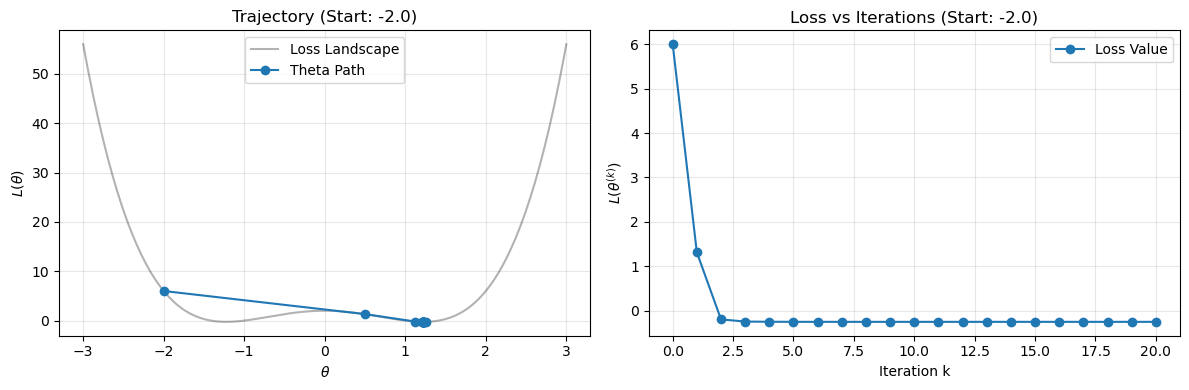

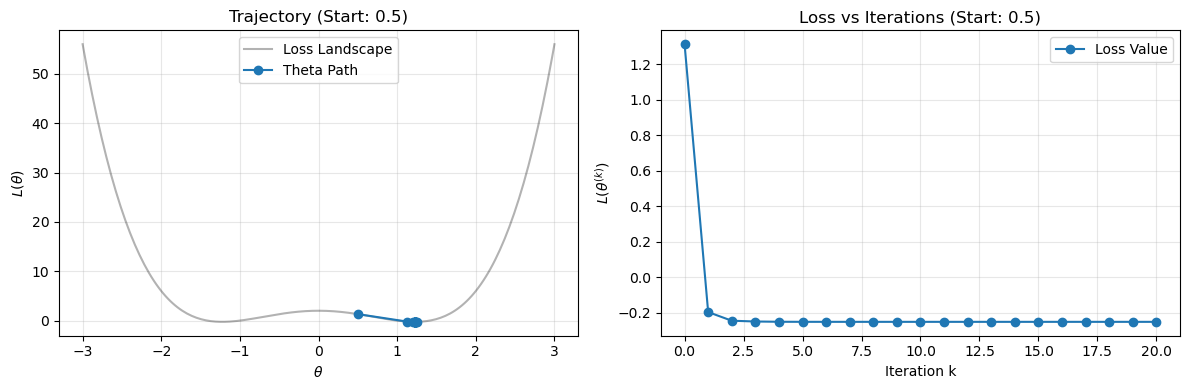

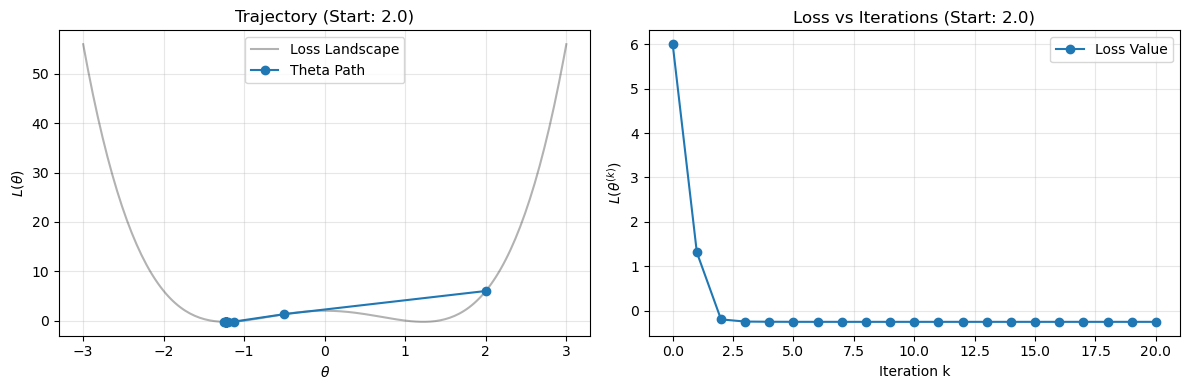

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(theta):
    return theta**4 - 3 * (theta**2) + 2

def gradient_fn(theta):
    return 4 * (theta**3) - 6 * theta


def backtracking(loss_fn, theta, grad, eta_init=1.0, beta=0.5, c=1e-4):
    eta = eta_init
    current_loss = loss_fn(theta)
    grad_norm_sq = grad**2 #grad is a scalar so using the np.dot is not necessary
    
    # Armijo: L(theta_new) <= L(theta) - c * eta * ||grad||^2
    while loss_fn(theta - eta * grad) > current_loss - c * eta * grad_norm_sq:
        eta *= beta
        
    return eta

def GD_backtracking(loss_fn, grad_fn, theta0, maxit=20):
    theta = theta0
    thetas = [theta]
    
    for _ in range(maxit):
        grad = grad_fn(theta)
        eta = backtracking(loss_fn, theta, grad)
        theta = theta - eta * grad
        thetas.append(theta)
    
    thetas = np.array(thetas)
    losses = loss_fn(thetas)
    
    return thetas, losses

start_points = [-2.0, 0.5, 2.0]

grid_theta = np.linspace(-3, 3, 200)
grid_loss = loss_fn(grid_theta)

for theta0 in start_points:
    thetas, losses = GD_backtracking(loss_fn, gradient_fn, theta0)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(grid_theta, grid_loss, 'k-', alpha=0.3, label='Loss Landscape')
    ax1.plot(thetas, losses, 'o-', label=f'Theta Path')
    ax1.set_title(f"Trajectory (Start: {theta0})")
    ax1.set_xlabel(r'$\theta$')
    ax1.set_ylabel(r'$L(\theta)$')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.plot(losses, 'o-', label='Loss Value')
    ax2.set_title(f"Loss vs Iterations (Start: {theta0})")
    ax2.set_xlabel('Iteration k')
    ax2.set_ylabel(r'$L(\theta^{(k)})$')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
 


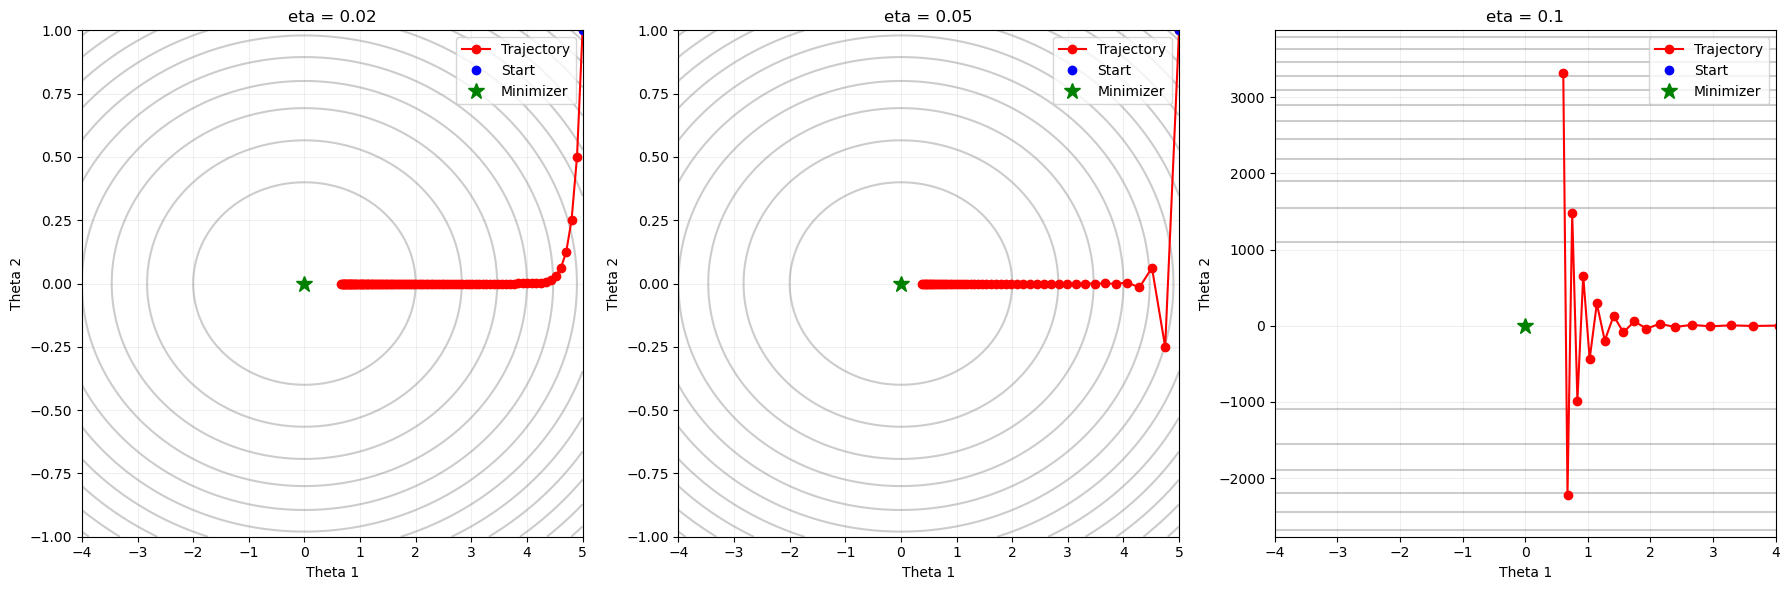

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definizione del Problema (Ill-Conditioned) ---
A = np.array([[1.0, 0.0], 
              [0.0, 25.0]])

def loss_fn(theta): 
    # Loss quadratica: 0.5 * theta.T * A * theta
    return 0.5 * theta.T @ A @ theta

def grad_fn(theta):
    # Gradiente: A * theta -> [theta_1, 25 * theta_2]
    return np.array([theta[0], 25 * theta[1]])

# --- 2. Algoritmo GD ---
def GD(grad_fn, theta0, eta, max_iter):
    theta = theta0.copy()
    thetas = [theta.copy()]
    
    for _ in range(max_iter):
        theta = theta - eta * grad_fn(theta)
        thetas.append(theta.copy())
        
    return np.array(thetas)

# --- 3. Esecuzione ---
start_theta = np.array([5.0, 1.0])
etas = [0.02, 0.05, 0.1]
max_iters = [100, 50, 20] # Iterazioni ottimizzate per la visualizzazione

trajectories = {}

for eta, n_iter in zip(etas, max_iters):
    trajectories[eta] = GD(grad_fn, start_theta, eta, n_iter)



plt.figure(figsize=(18, 6))

for i, eta in enumerate(etas):
    path = trajectories[eta]
    ax = plt.subplot(1, 3, i+1)

    if eta == 0.1:
        x_lims = (-4, 4)
        y_min, y_max = np.min(path[:,1]), np.max(path[:,1])
        pad = (y_max - y_min) * 0.1
        y_lims = (y_min - pad, y_max + pad)
    else:
        x_lims = (-4, 5)
        y_lims = (-1, 1) 

    grid_pts = 100
    xx = np.linspace(x_lims[0], x_lims[1], grid_pts)
    yy = np.linspace(y_lims[0], y_lims[1], grid_pts)
    X, Y = np.meshgrid(xx, yy)
    Z = 0.5 * (X**2 + 25 * Y**2)
    
    ax.contour(X, Y, Z, levels=15, colors='gray', alpha=0.4)
    ax.plot(path[:,0], path[:,1], 'o-', color='red', label='Trajectory')
    ax.plot(path[0,0], path[0,1], 'bo', label='Start')
    ax.plot(0, 0, 'g*', markersize=12, label='Minimizer')
    
    ax.set_title(f'eta = {eta}')
    ax.set_xlabel('Theta 1')
    ax.set_ylabel('Theta 2')
    ax.legend()
    ax.grid(True, alpha=0.2)
    

    ax.set_xlim(x_lims)
    ax.set_ylim(y_lims)

plt.tight_layout()
plt.show()

# Exercise 1.4

Final Loss (Exact LS):   1.6553e-18
Final Loss (Backtrack):  6.7002e-22


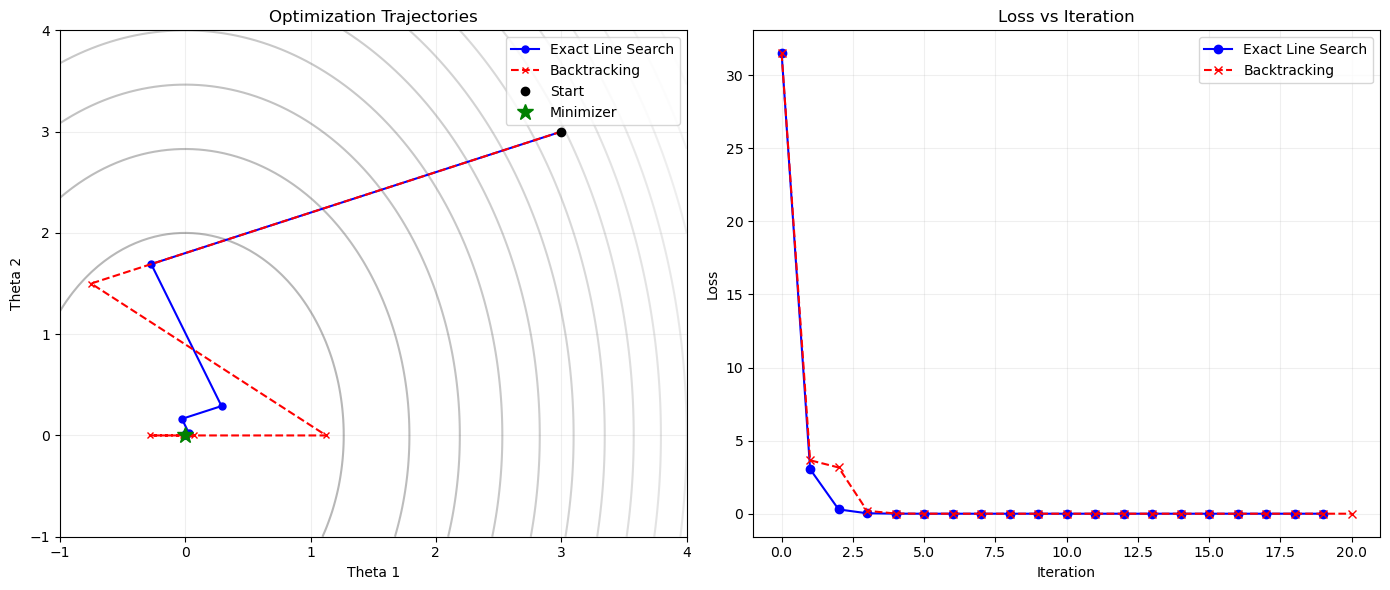

In [ ]:
A = np.array([[5, 0], [0, 2]])

def loss_fn(theta): 
    return 0.5 * (theta.T @ A @ theta)

def gradient_fn(theta): 
    return A @ theta

def GD_exact_line_search(loss_f, gradient_f, start_theta, n_iterations=20):
    theta = np.array(start_theta, dtype=float)
    theta_hist = [theta]
    loss_hist = [loss_f(theta)]
    eta_hist = []
    
    for k in range(n_iterations):
        gk = gradient_f(theta)
        if np.linalg.norm(gk) < 1e-8:
            break

        numerator = gk @ gk
        denominator = gk @ (A @ gk)
        optimal_eta = numerator / denominator
        theta = theta - optimal_eta * gk
        
        theta_hist.append(theta)
        loss_hist.append(loss_f(theta))
        eta_hist.append(optimal_eta)
        
    return theta_hist, loss_hist, eta_hist

def backtracking_search_2d(loss_f, theta, gradient, initial_eta=1.0, c=1e-4, rho=0.5):

    eta = initial_eta
    current_loss = loss_f(theta)
    norm_grad_sq = gradient @ gradient
    
    while loss_f(theta - eta * gradient) > current_loss - c * eta * norm_grad_sq:
        eta *= rho
            
    return eta

def GD_with_backtracking_2d(loss_f, gradient_f, start_theta, n_iterations=20):
    theta = np.array(start_theta, dtype=float)
    
    theta_hist = [theta]
    loss_hist = [loss_f(theta)]
    eta_hist = []
    
    for _ in range(n_iterations):
        gk = gradient_f(theta)
        eta = backtracking_search_2d(loss_f, theta, gk)
        theta = theta - eta * gk
        
        theta_hist.append(theta)
        loss_hist.append(loss_f(theta))
        eta_hist.append(eta)
        
    return theta_hist, loss_hist, eta_hist

start_point = np.array([3.0, 3.0])

exact_th, exact_loss, exact_etas = GD_exact_line_search(loss_fn,gradient_fn,start_point)

back_th, back_loss, back_etas = GD_with_backtracking_2d(loss_fn,gradient_fn,start_point)

print(f"Final Loss (Exact LS):   {exact_loss[-1]:.4e}")
print(f"Final Loss (Backtrack):  {back_loss[-1]:.4e}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

x_range = np.linspace(-1, 4, 100)
y_range = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = 0.5 * (5*X**2 + 2*Y**2)

plt.contour(X, Y, Z, levels=15, cmap='gray', alpha=0.3)

exact_x, exact_y = zip(*exact_th)
plt.plot(exact_x, exact_y, 'o-', color='blue', label='Exact Line Search', markersize=5)

back_x, back_y = zip(*back_th)
plt.plot(back_x, back_y, 'x--', color='red', label='Backtracking', markersize=5)
plt.plot(3, 3, 'ko', label='Start')
plt.plot(0, 0, 'g*', markersize=12, label='Minimizer')
plt.title("Optimization Trajectories")
plt.xlabel("Theta 1")
plt.ylabel("Theta 2")
plt.legend()
plt.grid(True, alpha=0.2)

plt.subplot(1, 2, 2)
plt.plot(exact_loss, 'b-o', label='Exact Line Search')
plt.plot(back_loss, 'r--x', label='Backtracking')
plt.title("Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Exercise 1.5

Starting simulations...
Simulations complete.


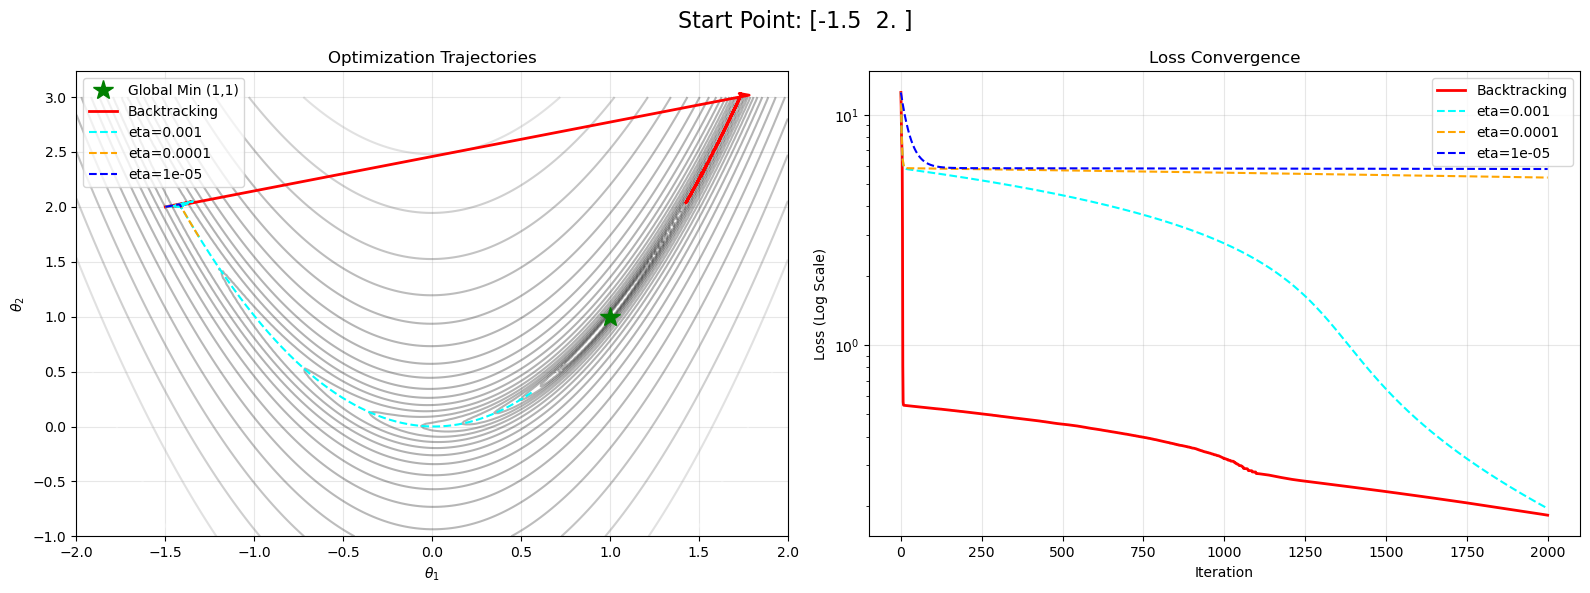

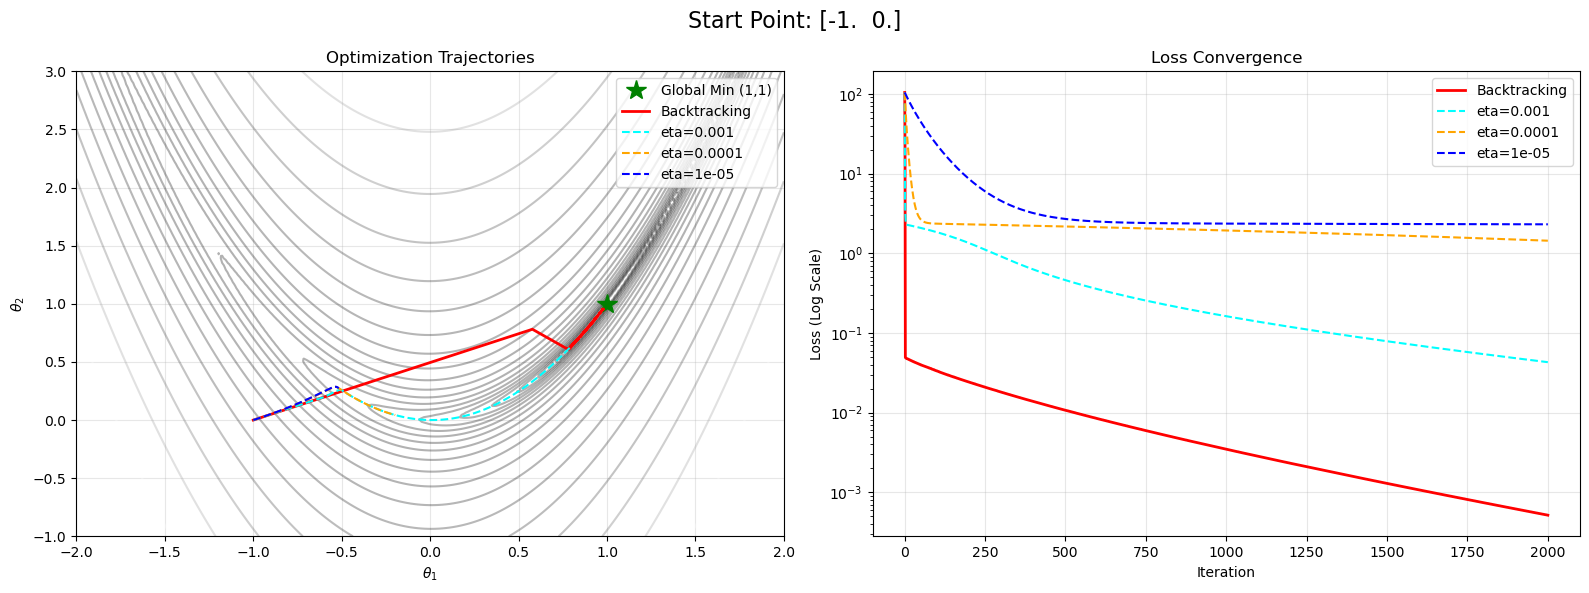

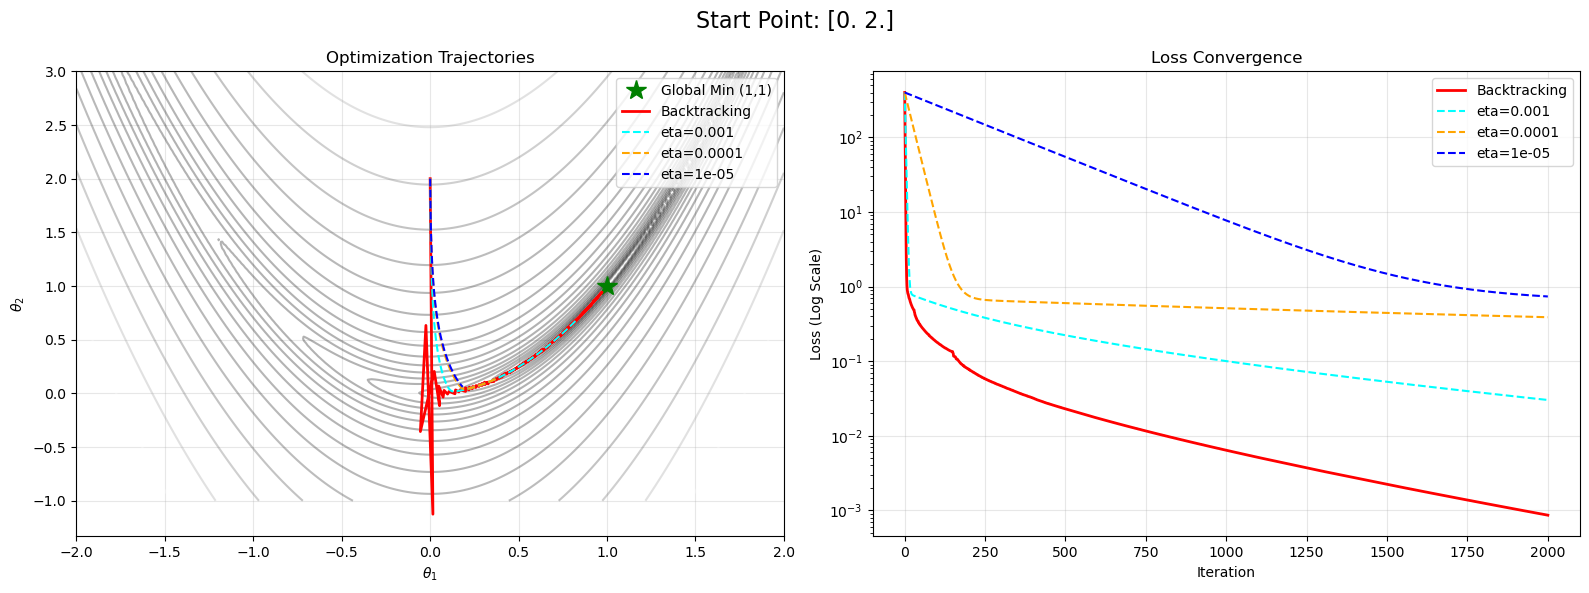

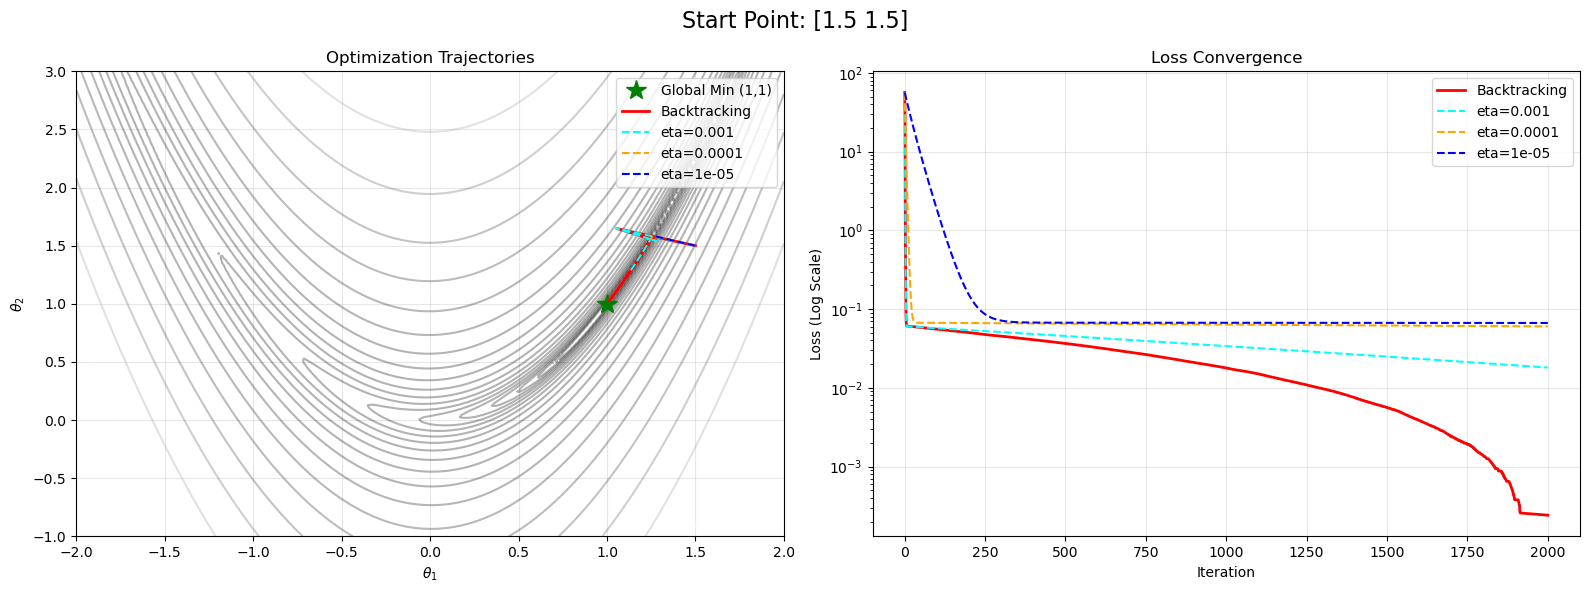

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock_loss(theta):
    t1, t2 = theta[0], theta[1]
    return (1 - t1)**2 + 100 * (t2 - t1**2)**2

def rosenbrock_grad(theta):
    t1, t2 = theta[0], theta[1]
    grad_t1 = -2 * (1 - t1) - 400 * t1 * (t2 - t1**2)
    grad_t2 = 200 * (t2 - t1**2)
    return np.array([grad_t1, grad_t2])

def gd_constant_step(loss_f, gradient_f, start_theta, learning_rate, n_iterations):
    theta = np.array(start_theta, dtype=float)
    theta_hist = [theta.copy()]
    loss_hist = [loss_f(theta)]
    
    for _ in range(n_iterations):
        grad = gradient_f(theta)
        theta = theta - learning_rate * grad
        
        theta_hist.append(theta.copy())
        loss_hist.append(loss_f(theta))
        
        if loss_hist[-1] > 1e10 or np.any(np.isnan(theta)):
            break
            
    return np.array(theta_hist), np.array(loss_hist)

def backtracking_search(loss_f, theta, gradient, initial_eta=1.0, c=1e-4, rho=0.5):
    eta = initial_eta
    current_loss = loss_f(theta)
    norm_grad_sq = np.dot(gradient, gradient)
    
    while loss_f(theta - eta * gradient) > current_loss - c * eta * norm_grad_sq:
        eta *= rho
        if eta < 1e-12: break
            
    return eta

def gd_backtracking(loss_f, gradient_f, start_theta, n_iterations):
    theta = np.array(start_theta, dtype=float)
    theta_hist = [theta.copy()]
    loss_hist = [loss_f(theta)]
    
    for _ in range(n_iterations):
        grad = gradient_f(theta)
        eta = backtracking_search(loss_f, theta, grad)
        theta = theta - eta * grad
        
        theta_hist.append(theta.copy())
        loss_hist.append(loss_f(theta))
        
    return np.array(theta_hist), np.array(loss_hist)

start_points = [
    np.array([-1.5, 2.0]),
    np.array([-1.0, 0.0]),
    np.array([0.0, 2.0]),
    np.array([1.5, 1.5])
]

constant_etas = [1e-3, 1e-4, 1e-5]
n_iter = 2000 
results = {}

print("Starting simulations...")

for start_pt in start_points:
    pt_key = tuple(start_pt)
    results[pt_key] = {}
    
    for eta in constant_etas:
        th_hist, l_hist = gd_constant_step(rosenbrock_loss, rosenbrock_grad, start_pt, eta, n_iter)
        results[pt_key][f'eta={eta}'] = (th_hist, l_hist)
        
    th_hist_bt, l_hist_bt = gd_backtracking(rosenbrock_loss, rosenbrock_grad, start_pt, n_iter)
    results[pt_key]['backtracking'] = (th_hist_bt, l_hist_bt)

print("Simulations complete.")

x_range = np.linspace(-2.0, 2.0, 200)
y_range = np.linspace(-1.0, 3.0, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rosenbrock_loss([X[i, j], Y[i, j]])

for start_pt in start_points:
    pt_key = tuple(start_pt)
    data = results[pt_key]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Start Point: {start_pt}", fontsize=16)
    
    ax1 = axes[0]
    ax1.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='gray', alpha=0.3)
    ax1.plot(1, 1, 'g*', markersize=15, label='Global Min (1,1)')
    
    bt_th, _ = data['backtracking']
    ax1.plot(bt_th[:,0], bt_th[:,1], 'r-', linewidth=2, label='Backtracking')
    
    colors = ['cyan', 'orange', 'blue']
    for idx, eta in enumerate(constant_etas):
        c_th, _ = data[f'eta={eta}']
        ax1.plot(c_th[:,0], c_th[:,1], '--', color=colors[idx], label=f'eta={eta}')
        
    ax1.set_xlabel(r'$\theta_1$')
    ax1.set_ylabel(r'$\theta_2$')
    ax1.set_title("Optimization Trajectories")
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2 = axes[1]
    _, bt_loss = data['backtracking']
    ax2.plot(bt_loss, 'r-', linewidth=2, label='Backtracking')
    
    for idx, eta in enumerate(constant_etas):
        _, c_loss = data[f'eta={eta}']
        ax2.plot(c_loss, '--', color=colors[idx], label=f'eta={eta}')
        
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Loss (Log Scale)")
    ax2.set_yscale('log')
    ax2.set_title("Loss Convergence")
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()